In [1]:
from qiskit import QuantumCircuit
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram

#Lazy programmers be like
def d(): return qc.draw(output='mpl')

Enter state for first bit: 0
Enter state for second bit: 1
Enter state for carry in bit: 1


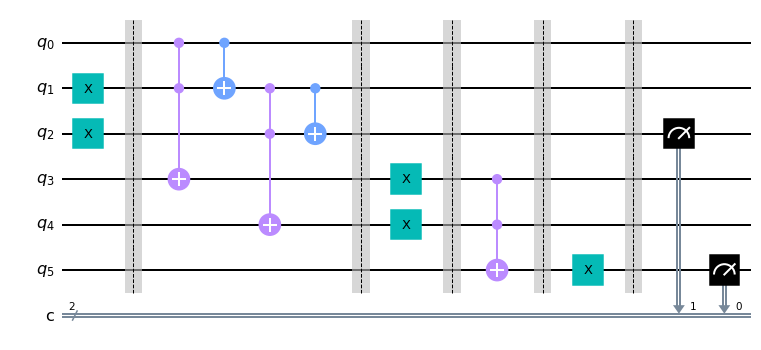

In [2]:
qc = QuantumCircuit(6, 2)

#initial decision 
fQbit = input('Enter state for first bit: ')
sQbit = input('Enter state for second bit: ')
cinQbit = input('Enter state for carry in bit: ')
if fQbit == '1': qc.x(0)
if sQbit == '1': qc.x(1)
if cinQbit == '1': qc.x(2)
    
#barrier 1
qc.barrier()

#and1
qc.ccx(0,1,3)

#xor1 
qc.cx(0,1)

#and2 
qc.ccx(1,2,4)

#xor2
qc.cx(1,2)

#Or 
qc.barrier()
qc.x(3)
qc.x(4)
qc.barrier()
qc.ccx(3,4,5)
qc.barrier()
qc.x(5)

qc.barrier()

qc.measure(2,1)
qc.measure(5,0)


%matplotlib inline
d()

In [3]:
#simulator setup
sim = AerSimulator()
job = sim.run(qc)
result = job.result()
counts = result.get_counts()

#provide results
for summation, carryOut in counts:
    print(f"Value summed output is {summation}")
    print(f"Value carried output is: {carryOut}" )

Value carried output is: 1
Value summed output is 0
